In [1]:
import h5py
import numpy as np
import matplotlib
import sys
#matplotlib.use('Agg')
matplotlib.rcParams['mathtext.default'] = 'regular'
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from PIL import Image
from numpy import inf
import numpy.ma as ma
from numpy import *

/Users/litadlc/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Loading save number density files (n(v) at different j,k values)
n_v_SiII=np.load('n_v_SiII.npy')
n_v_SiIV=np.load('n_v_SiIV.npy')
n_v_OI=np.load('n_v_OI.npy')
n_v_OVI=np.load('n_v_OVI.npy')
n_v_CII=np.load('n_v_CII.npy')
n_v_CIV=np.load('n_v_CIV.npy')
n_v_SII=np.load('n_v_SII.npy')
n_v_NV=np.load('n_v_NV.npy')

In [3]:
#Constant that are needed to calculate Tau(v)
me=9.10e-28 #mass of electron in grams
c=3e18 #speed of light in Angstroms per sec
dv=1.2e6  #in cm length of velocity 
dr=4.94e20 #length of box in cm length along the x-axis
e = 4.80e-10 #in esu=((cm^3/2)*(grams^1/2))/s
#oscillator strength 
f_s_SiII=1.18
f_w_SiII=0.582
f_s_SiIV=0.524
f_w_SiIV=0.26
#f_s_OI=0.048
#f_w_OI=
f_s_OVI=0.1325
f_w_OVI=0.0658
f_s_CII=0.336
f_w_CII=0.168
f_s_CIV=0.190
f_w_CIV=0.0952
#f_s_SII=0.336
#f_w_SII=0.168
f_s_NV=0.156
f_w_NV=0.0777

#rest wave-length
rw_s_SiII=1260 # in Angstroms
rw_w_SiII=1193
rw_s_SiIV=1394 # in Angstroms
rw_w_SiIV=1403
#rw_s_OI=1302 #in Angstroms
#rw_w_OI=
rw_s_OVI=1032 #in Angstroms
rw_w_OVI=1038
rw_CII=904 #in Angstroms(similar value for both strong + week line)
rw_s_CIV=1548 #in Angstroms
rw_w_CIV=1551 #in Angstroms
rw_s_NV=1239 #in Angstroms
rw_w_NV=1243 #in Angstroms

In [4]:
dx = 2.411e17# size scale, in cm, 5/64 pc
T_jkw_SiII= ((((np.pi)*(e**2))/(me*c))*f_w_SiII*n_v_SiII*rw_w_SiII*(dx/dv))
T_jkw_SiIV= ((((np.pi)*(e**2))/(me*c))*f_w_SiIV*n_v_SiIV*rw_w_SiIV*(dx/dv))
T_jkw_OVI = ((((np.pi)*(e**2))/(me*c))*f_w_OVI*n_v_OVI*rw_w_OVI*(dx/dv))
T_jkw_CII= ((((np.pi)*(e**2))/(me*c))*f_w_CII*n_v_CII*rw_CII*(dx/dv))
T_jkw_CIV= ((((np.pi)*(e**2))/(me*c))*f_w_CIV*n_v_CIV*rw_w_CIV*(dx/dv))
T_jkw_NV= ((((np.pi)*(e**2))/(me*c))*f_w_NV*n_v_NV*rw_w_NV*(dx/dv))
#T_w_SiII_50_sum=T_jkw_SiII.mean(axis=(0,1))
#np.max(T_w_SiII_50_sum)

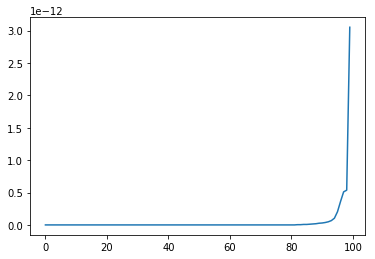

In [5]:
#T_jkw_SiII[T_jkw_SiII != 0]
#test=T_jkw_SiII[T_jkw_SiII>0]
test3=np.median(T_jkw_SiII,axis=(0,1))
plt.plot(test3)
plt.show()

In [6]:
#At ~48km/s
T_w_SiII_50=T_jkw_SiII[:,:,4]
T_w_SiIV_50=T_jkw_SiIV[:,:,4]
T_w_OVI_50=T_jkw_OVI[:,:,4]
T_w_CII_50=T_jkw_CII[:,:,4]
T_w_CIV_50=T_jkw_CIV[:,:,4]
T_w_NV_50=T_jkw_NV[:,:,4]
#At ~96km/s
T_w_SiII_96=T_jkw_SiII[:,:,8]
T_w_SiIV_96=T_jkw_SiIV[:,:,8]
T_w_OVI_96=T_jkw_OVI[:,:,8]
T_w_CII_96=T_jkw_CII[:,:,8]
T_w_CIV_96=T_jkw_CIV[:,:,8]
T_w_NV_96=T_jkw_NV[:,:,8]
#At ~144km/s
T_w_SiII_144=T_jkw_SiII[:,:,12]
T_w_SiIV_144=T_jkw_SiIV[:,:,12]
T_w_OVI_144=T_jkw_OVI[:,:,12]
T_w_CII_144=T_jkw_CII[:,:,12]
T_w_CIV_144=T_jkw_CIV[:,:,12]
T_w_NV_144=T_jkw_NV[:,:,12]
#At 192 km/s
T_w_SiII_192=T_jkw_SiII[:,:,16]
T_w_SiIV_192=T_jkw_SiIV[:,:,16]
T_w_OVI_192=T_jkw_OVI[:,:,16]
T_w_CII_192=T_jkw_CII[:,:,16]
T_w_CIV_192=T_jkw_CIV[:,:,16]
T_w_NV_192=T_jkw_NV[:,:,16]
#At 240 km/s
T_w_SiII_240=T_jkw_SiII[:,:,20]
T_w_SiIV_240=T_jkw_SiIV[:,:,20]
T_w_OVI_240=T_jkw_OVI[:,:,20]
T_w_CII_240=T_jkw_CII[:,:,20]
T_w_CIV_240=T_jkw_CIV[:,:,20]
T_w_NV_240=T_jkw_NV[:,:,20]
#At 288 km/s
T_w_SiII_288=T_jkw_SiII[:,:,24]
T_w_SiIV_288=T_jkw_SiIV[:,:,24]
T_w_OVI_288=T_jkw_OVI[:,:,24]
T_w_CII_288=T_jkw_CII[:,:,24]
T_w_CIV_288=T_jkw_CIV[:,:,24]
T_w_NV_288=T_jkw_NV[:,:,24]
#At 336 km/s
T_w_SiII_336=T_jkw_SiII[:,:,28]
T_w_SiIV_336=T_jkw_SiIV[:,:,28]
T_w_OVI_336=T_jkw_OVI[:,:,28]
T_w_CII_336=T_jkw_CII[:,:,28]
T_w_CIV_336=T_jkw_CIV[:,:,28]
T_w_NV_336=T_jkw_NV[:,:,28]
#At 384 km/s
T_w_SiII_384=T_jkw_SiII[:,:,32]
T_w_SiIV_384=T_jkw_SiIV[:,:,32]
T_w_OVI_384=T_jkw_OVI[:,:,32]
T_w_CII_384=T_jkw_CII[:,:,32]
T_w_CIV_384=T_jkw_CIV[:,:,32]
T_w_NV_384=T_jkw_NV[:,:,32]

In [7]:
#At ~48 km/s
T_w_SiII_50_rs=np.reshape(T_w_SiII_50,512*512)
T_w_SiIV_50_rs=np.reshape(T_w_SiIV_50,512*512)
T_w_OVI_50_rs=np.reshape(T_w_OVI_50,512*512)
T_w_CII_50_rs=np.reshape(T_w_CII_50,512*512)
T_w_CIV_50_rs=np.reshape(T_w_CIV_50,512*512)
T_w_NV_50_rs=np.reshape(T_w_NV_50,512*512)
#At ~96km/s
T_w_SiII_96_rs=np.reshape(T_w_SiII_96,512*512)
T_w_SiIV_96_rs=np.reshape(T_w_SiIV_96,512*512)
T_w_OVI_96_rs=np.reshape(T_w_OVI_96,512*512)
T_w_CII_96_rs=np.reshape(T_w_CII_96,512*512)
T_w_CIV_96_rs=np.reshape(T_w_CIV_96,512*512)
T_w_NV_96_rs=np.reshape(T_w_NV_96,512*512)
#At ~144km/s
T_w_SiII_144_rs=np.reshape(T_w_SiII_144,512*512)
T_w_SiIV_144_rs=np.reshape(T_w_SiIV_144,512*512)
T_w_OVI_144_rs=np.reshape(T_w_OVI_144,512*512)
T_w_CII_144_rs=np.reshape(T_w_CII_144,512*512)
T_w_CIV_144_rs=np.reshape(T_w_CIV_144,512*512)
T_w_NV_144_rs=np.reshape(T_w_NV_144,512*512)
#At ~192km/s
T_w_SiII_192_rs=np.reshape(T_w_SiII_192,512*512)
T_w_SiIV_192_rs=np.reshape(T_w_SiIV_192,512*512)
T_w_OVI_192_rs=np.reshape(T_w_OVI_192,512*512)
T_w_CII_192_rs=np.reshape(T_w_CII_192,512*512)
T_w_CIV_192_rs=np.reshape(T_w_CIV_192,512*512)
T_w_NV_192_rs=np.reshape(T_w_NV_192,512*512)
#At ~240km/s
T_w_SiII_240_rs=np.reshape(T_w_SiII_240,512*512)
T_w_SiIV_240_rs=np.reshape(T_w_SiIV_240,512*512)
T_w_OVI_240_rs=np.reshape(T_w_OVI_240,512*512)
T_w_CII_240_rs=np.reshape(T_w_CII_240,512*512)
T_w_CIV_240_rs=np.reshape(T_w_CIV_240,512*512)
T_w_NV_240_rs=np.reshape(T_w_NV_240,512*512)
#At ~288km/s
T_w_SiII_288_rs=np.reshape(T_w_SiII_288,512*512)
T_w_SiIV_288_rs=np.reshape(T_w_SiIV_288,512*512)
T_w_OVI_288_rs=np.reshape(T_w_OVI_288,512*512)
T_w_CII_288_rs=np.reshape(T_w_CII_288,512*512)
T_w_CIV_288_rs=np.reshape(T_w_CIV_288,512*512)
T_w_NV_288_rs=np.reshape(T_w_NV_288,512*512)
#At ~336km/s
T_w_SiII_336_rs=np.reshape(T_w_SiII_336,512*512)
T_w_SiIV_336_rs=np.reshape(T_w_SiIV_336,512*512)
T_w_OVI_336_rs=np.reshape(T_w_OVI_336,512*512)
T_w_CII_336_rs=np.reshape(T_w_CII_336,512*512)
T_w_CIV_336_rs=np.reshape(T_w_CIV_336,512*512)
T_w_NV_336_rs=np.reshape(T_w_NV_336,512*512)
#At ~384km/s
T_w_SiII_384_rs=np.reshape(T_w_SiII_384,512*512)
T_w_SiIV_384_rs=np.reshape(T_w_SiIV_384,512*512)
T_w_OVI_384_rs=np.reshape(T_w_OVI_384,512*512)
T_w_CII_384_rs=np.reshape(T_w_CII_384,512*512)
T_w_CIV_384_rs=np.reshape(T_w_CIV_384,512*512)
T_w_NV_384_rs=np.reshape(T_w_NV_384,512*512)

In [8]:
#bins for histograms
bins=np.logspace(-1,2,100)


<Figure size 864x792 with 0 Axes>

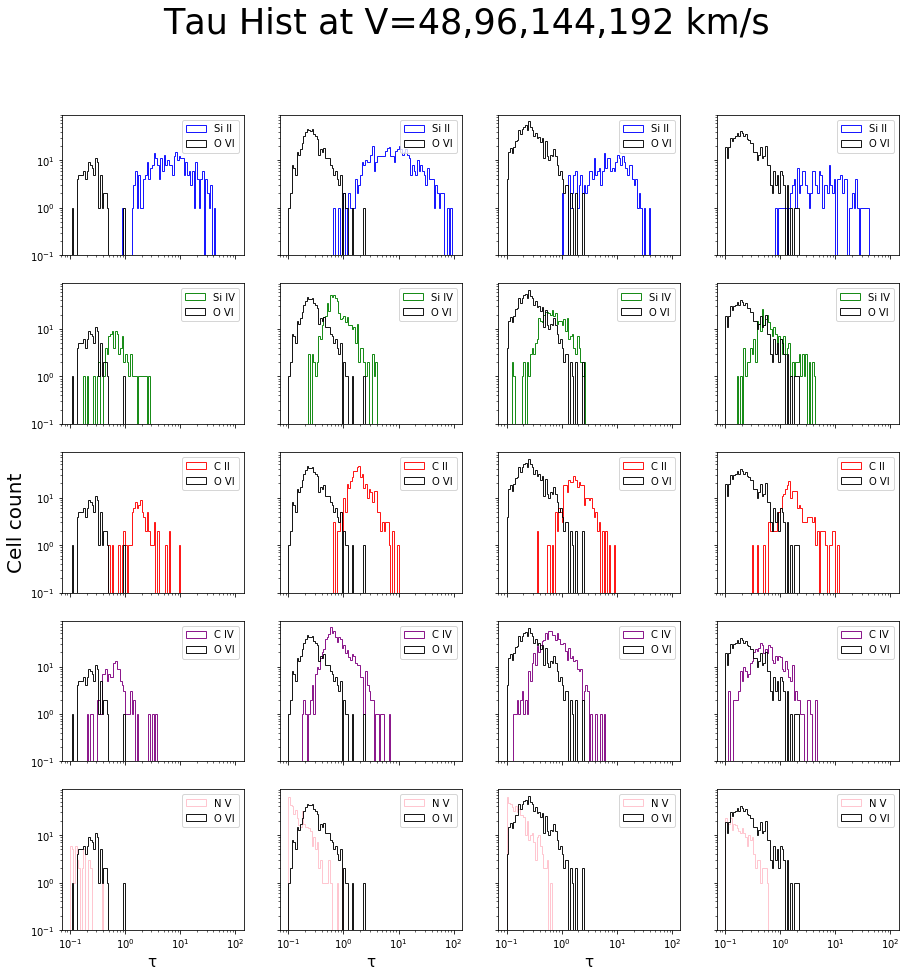

In [9]:
fig = plt.figure(figsize=(12,11))
f, ((ax1, ax2,ax3,ax4), (ax5, ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20)) = plt.subplots(5, 4, sharex='col', sharey='row',figsize=(15,15))
f.suptitle('Tau Hist at V=48,96,144,192 km/s',fontsize=35)
bins=np.logspace(-1,2,100)
ax1.hist(T_w_SiII_50_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='blue',label ='Si II')
ax1.hist(T_w_OVI_50_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax2.hist(T_w_SiII_96_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='blue',label ='Si II')
ax2.hist(T_w_OVI_96_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax3.hist(T_w_SiII_144_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='blue',label ='Si II')
ax3.hist(T_w_OVI_144_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax4.hist(T_w_SiII_192_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='blue',label ='Si II')
ax4.hist(T_w_OVI_192_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')

ax5.hist(T_w_SiIV_50_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='green',label ='Si IV')
ax5.hist(T_w_OVI_50_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax6.hist(T_w_SiIV_96_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='green',label ='Si IV')
ax6.hist(T_w_OVI_96_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax7.hist(T_w_SiIV_144_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='green',label ='Si IV')
ax7.hist(T_w_OVI_144_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax8.hist(T_w_SiIV_192_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='green',label ='Si IV')
ax8.hist(T_w_OVI_192_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')

ax9.hist(T_w_CII_50_rs,bins=bins,histtype='step',alpha=0.9,log=True,rwidth=4.0, color='red',label ='C II')
ax9.hist(T_w_OVI_50_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax10.hist(T_w_CII_96_rs,bins=bins,histtype='step',alpha=0.9,log=True,rwidth=4.0, color='red',label ='C II')
ax10.hist(T_w_OVI_96_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax11.hist(T_w_CII_144_rs,bins=bins,histtype='step',alpha=0.9,log=True,rwidth=4.0, color='red',label ='C II')
ax11.hist(T_w_OVI_144_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax12.hist(T_w_CII_192_rs,bins=bins,histtype='step',alpha=0.9,log=True,rwidth=4.0, color='red',label ='C II')
ax12.hist(T_w_OVI_192_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')

ax13.hist(T_w_CIV_50_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='purple',label ='C IV')
ax13.hist(T_w_OVI_50_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax14.hist(T_w_CIV_96_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='purple',label ='C IV')
ax14.hist(T_w_OVI_96_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax15.hist(T_w_CIV_144_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='purple',label ='C IV')
ax15.hist(T_w_OVI_144_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax16.hist(T_w_CIV_192_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='purple',label ='C IV')
ax16.hist(T_w_OVI_192_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')

ax17.hist(T_w_NV_50_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='pink',label ='N V')
ax17.hist(T_w_OVI_50_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax18.hist(T_w_NV_96_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='pink',label ='N V')
ax18.hist(T_w_OVI_96_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax19.hist(T_w_NV_144_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='pink',label ='N V')
ax19.hist(T_w_OVI_144_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax20.hist(T_w_NV_192_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='pink',label ='N V')
ax20.hist(T_w_OVI_192_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')

ax1.legend(loc='upper right',fontsize=10)
ax2.legend(loc='upper right',fontsize=10)
ax3.legend(loc='upper right',fontsize=10)
ax4.legend(loc='upper right',fontsize=10)
ax5.legend(loc='upper right',fontsize=10)
ax6.legend(loc='upper right',fontsize=10)
ax7.legend(loc='upper right',fontsize=10)
ax8.legend(loc='upper right',fontsize=10)
ax9.legend(loc='upper right',fontsize=10)
ax10.legend(loc='upper right',fontsize=10)
ax11.legend(loc='upper right',fontsize=10)
ax12.legend(loc='upper right',fontsize=10)
ax13.legend(loc='upper right',fontsize=10)
ax14.legend(loc='upper right',fontsize=10)
ax15.legend(loc='upper right',fontsize=10)
ax16.legend(loc='upper right',fontsize=10)
ax17.legend(loc='upper right',fontsize=10)
ax18.legend(loc='upper right',fontsize=10)
ax19.legend(loc='upper right',fontsize=10)
ax20.legend(loc='upper right',fontsize=10)
ax17.set_xlabel(r'$\tau$',fontsize=15)
ax18.set_xlabel(r'$\tau$',fontsize=15)
ax19.set_xlabel(r'$\tau$',fontsize=15)
ax9.set_ylabel(r'Cell count',fontsize=20)
ax17.set_xscale("log")
ax18.set_xscale("log")
ax19.set_xscale("log")
ax20.set_xscale("log")
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.xscale("log")
plt.show()

<Figure size 864x792 with 0 Axes>

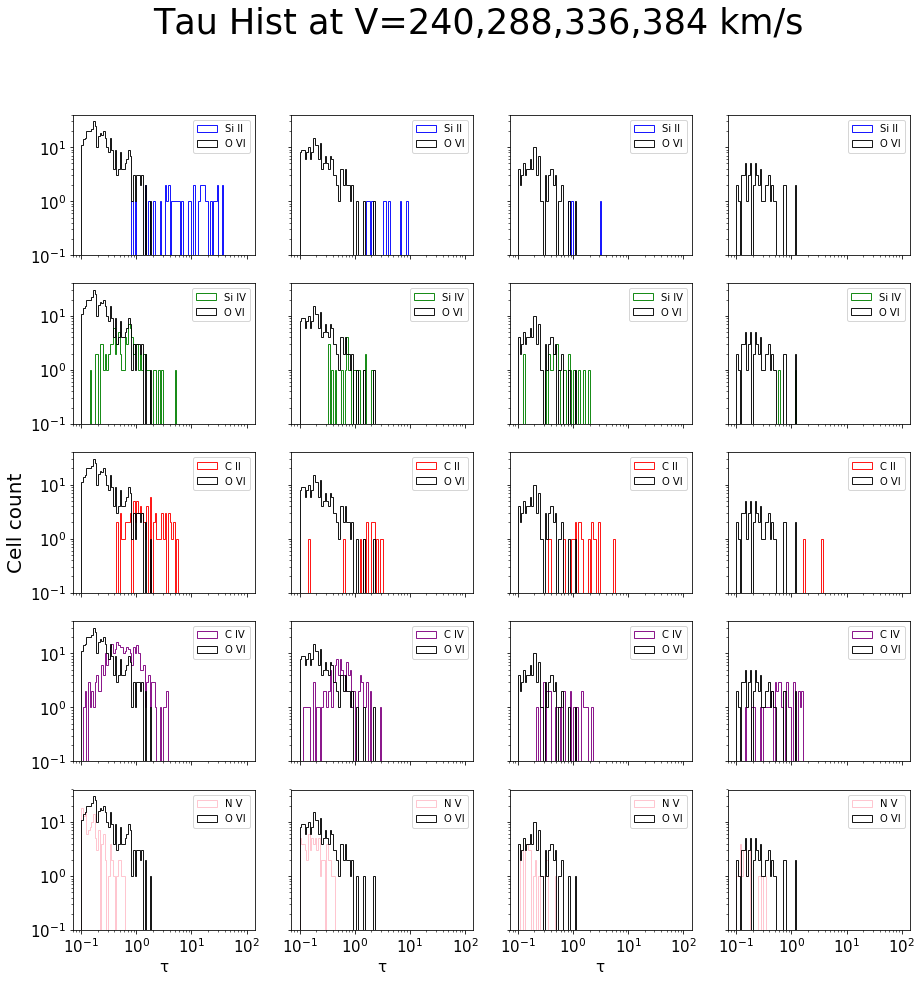

In [10]:
fig = plt.figure(figsize=(12,11))
f, ((ax1, ax2,ax3,ax4), (ax5, ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20)) = plt.subplots(5, 4, sharex='col', sharey='row',figsize=(15,15))
f.suptitle('Tau Hist at V=240,288,336,384 km/s',fontsize=35)
bins=np.logspace(-1,2,100)
ax1.hist(T_w_SiII_240_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='blue',label ='Si II')
ax1.hist(T_w_OVI_240_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax2.hist(T_w_SiII_288_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='blue',label ='Si II')
ax2.hist(T_w_OVI_288_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax3.hist(T_w_SiII_336_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='blue',label ='Si II')
ax3.hist(T_w_OVI_336_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax4.hist(T_w_SiII_384_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='blue',label ='Si II')
ax4.hist(T_w_OVI_384_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')

ax5.hist(T_w_SiIV_240_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='green',label ='Si IV')
ax5.hist(T_w_OVI_240_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax6.hist(T_w_SiIV_288_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='green',label ='Si IV')
ax6.hist(T_w_OVI_288_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax7.hist(T_w_SiIV_336_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='green',label ='Si IV')
ax7.hist(T_w_OVI_336_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax8.hist(T_w_SiIV_384_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='green',label ='Si IV')
ax8.hist(T_w_OVI_384_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')

ax9.hist(T_w_CII_240_rs,bins=bins,histtype='step',alpha=0.9,log=True,rwidth=4.0, color='red',label ='C II')
ax9.hist(T_w_OVI_240_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax10.hist(T_w_CII_288_rs,bins=bins,histtype='step',alpha=0.9,log=True,rwidth=4.0, color='red',label ='C II')
ax10.hist(T_w_OVI_288_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax11.hist(T_w_CII_336_rs,bins=bins,histtype='step',alpha=0.9,log=True,rwidth=4.0, color='red',label ='C II')
ax11.hist(T_w_OVI_336_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax12.hist(T_w_CII_384_rs,bins=bins,histtype='step',alpha=0.9,log=True,rwidth=4.0, color='red',label ='C II')
ax12.hist(T_w_OVI_384_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')

ax13.hist(T_w_CIV_240_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='purple',label ='C IV')
ax13.hist(T_w_OVI_240_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax14.hist(T_w_CIV_288_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='purple',label ='C IV')
ax14.hist(T_w_OVI_288_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax15.hist(T_w_CIV_336_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='purple',label ='C IV')
ax15.hist(T_w_OVI_336_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax16.hist(T_w_CIV_384_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='purple',label ='C IV')
ax16.hist(T_w_OVI_384_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')

ax17.hist(T_w_NV_240_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='pink',label ='N V')
ax17.hist(T_w_OVI_240_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax18.hist(T_w_NV_288_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='pink',label ='N V')
ax18.hist(T_w_OVI_288_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax19.hist(T_w_NV_336_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='pink',label ='N V')
ax19.hist(T_w_OVI_336_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')
ax20.hist(T_w_NV_384_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='pink',label ='N V')
ax20.hist(T_w_OVI_384_rs,bins=bins,histtype='step',alpha=0.9,log=True, rwidth=4.0, color='black',label ='O VI')

ax1.legend(loc='upper right',fontsize=10)
ax2.legend(loc='upper right',fontsize=10)
ax3.legend(loc='upper right',fontsize=10)
ax4.legend(loc='upper right',fontsize=10)
ax5.legend(loc='upper right',fontsize=10)
ax6.legend(loc='upper right',fontsize=10)
ax7.legend(loc='upper right',fontsize=10)
ax8.legend(loc='upper right',fontsize=10)
ax9.legend(loc='upper right',fontsize=10)
ax10.legend(loc='upper right',fontsize=10)
ax11.legend(loc='upper right',fontsize=10)
ax12.legend(loc='upper right',fontsize=10)
ax13.legend(loc='upper right',fontsize=10)
ax14.legend(loc='upper right',fontsize=10)
ax15.legend(loc='upper right',fontsize=10)
ax16.legend(loc='upper right',fontsize=10)
ax17.legend(loc='upper right',fontsize=10)
ax18.legend(loc='upper right',fontsize=10)
ax19.legend(loc='upper right',fontsize=10)
ax20.legend(loc='upper right',fontsize=10)
ax17.set_xlabel(r'$\tau$',fontsize=15)
ax18.set_xlabel(r'$\tau$',fontsize=15)
ax19.set_xlabel(r'$\tau$',fontsize=15)
ax9.set_ylabel(r'Cell count',fontsize=20)
ax17.set_xscale("log")
ax18.set_xscale("log")
ax19.set_xscale("log")
ax20.set_xscale("log")
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.xscale("log")
plt.show()

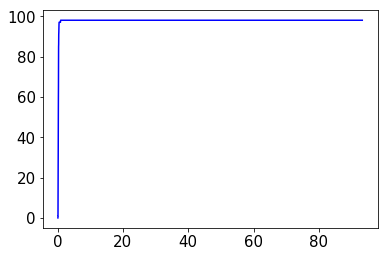

In [11]:
hist,bin_edges=np.histogram(T_w_OVI_50_rs,bins=bins)
cumulative=np.cumsum(hist)
plt.plot(bin_edges[:-1],cumulative, c='blue')

<Figure size 864x792 with 0 Axes>

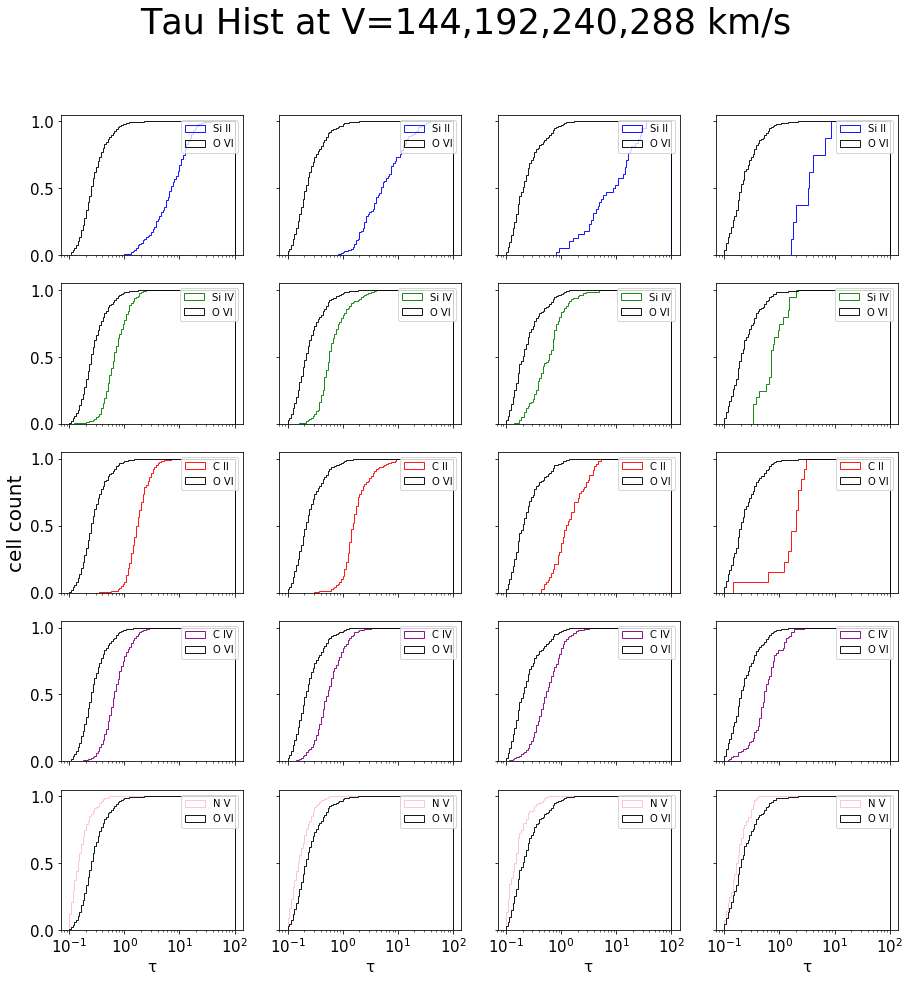

In [12]:
fig = plt.figure(figsize=(12,11))
f, ((ax1, ax2,ax3,ax4), (ax5, ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20)) = plt.subplots(5, 4, sharex='col', sharey='row',figsize=(15,15))
f.suptitle('Tau Hist at V=144,192,240,288 km/s',fontsize=35)
bins=np.logspace(-1,2,100)

ax1.hist(T_w_SiII_144_rs,bins=bins,density=True,histtype='step',cumulative=True, alpha=0.9, rwidth=4.0, color='blue',label ='Si II')
ax1.hist(T_w_OVI_144_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9, rwidth=4.0, color='black',label ='O VI')
ax2.hist(T_w_SiII_192_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9, rwidth=4.0, color='blue',label ='Si II')
ax2.hist(T_w_OVI_192_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='black',label ='O VI')
ax3.hist(T_w_SiII_240_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9, rwidth=4.0, color='blue',label ='Si II')
ax3.hist(T_w_OVI_240_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9, rwidth=4.0, color='black',label ='O VI')
ax4.hist(T_w_SiII_288_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='blue',label ='Si II')
ax4.hist(T_w_OVI_288_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9, rwidth=4.0, color='black',label ='O VI')

ax5.hist(T_w_SiIV_144_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9, rwidth=4.0, color='green',label ='Si IV')
ax5.hist(T_w_OVI_144_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='black',label ='O VI')
ax6.hist(T_w_SiIV_192_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9, rwidth=4.0, color='green',label ='Si IV')
ax6.hist(T_w_OVI_192_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='black',label ='O VI')
ax7.hist(T_w_SiIV_240_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9, rwidth=4.0, color='green',label ='Si IV')
ax7.hist(T_w_OVI_240_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9, rwidth=4.0, color='black',label ='O VI')
ax8.hist(T_w_SiIV_288_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9, rwidth=4.0, color='green',label ='Si IV')
ax8.hist(T_w_OVI_288_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='black',label ='O VI')

ax9.hist(T_w_CII_144_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='red',label ='C II')
ax9.hist(T_w_OVI_144_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='black',label ='O VI')
ax10.hist(T_w_CII_192_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='red',label ='C II')
ax10.hist(T_w_OVI_192_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='black',label ='O VI')
ax11.hist(T_w_CII_240_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='red',label ='C II')
ax11.hist(T_w_OVI_240_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='black',label ='O VI')
ax12.hist(T_w_CII_288_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='red',label ='C II')
ax12.hist(T_w_OVI_288_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9, rwidth=4.0, color='black',label ='O VI')

ax13.hist(T_w_CIV_144_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9, rwidth=4.0, color='purple',label ='C IV')
ax13.hist(T_w_OVI_144_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='black',label ='O VI')
ax14.hist(T_w_CIV_192_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='purple',label ='C IV')
ax14.hist(T_w_OVI_192_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='black',label ='O VI')
ax15.hist(T_w_CIV_240_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='purple',label ='C IV')
ax15.hist(T_w_OVI_240_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='black',label ='O VI')
ax16.hist(T_w_CIV_288_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='purple',label ='C IV')
ax16.hist(T_w_OVI_288_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='black',label ='O VI')

ax17.hist(T_w_NV_144_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='pink',label ='N V')
ax17.hist(T_w_OVI_144_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='black',label ='O VI')
ax18.hist(T_w_NV_192_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9, rwidth=4.0, color='pink',label ='N V')
ax18.hist(T_w_OVI_192_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='black',label ='O VI')
ax19.hist(T_w_NV_240_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='pink',label ='N V')
ax19.hist(T_w_OVI_240_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9, rwidth=4.0, color='black',label ='O VI')
ax20.hist(T_w_NV_288_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='pink',label ='N V')
ax20.hist(T_w_OVI_288_rs,bins=bins,density=True,histtype='step',cumulative=True,alpha=0.9,rwidth=4.0, color='black',label ='O VI')

ax1.legend(loc='upper right',fontsize=10)
ax2.legend(loc='upper right',fontsize=10)
ax3.legend(loc='upper right',fontsize=10)
ax4.legend(loc='upper right',fontsize=10)
ax5.legend(loc='upper right',fontsize=10)
ax6.legend(loc='upper right',fontsize=10)
ax7.legend(loc='upper right',fontsize=10)
ax8.legend(loc='upper right',fontsize=10)
ax9.legend(loc='upper right',fontsize=10)
ax10.legend(loc='upper right',fontsize=10)
ax11.legend(loc='upper right',fontsize=10)
ax12.legend(loc='upper right',fontsize=10)
ax13.legend(loc='upper right',fontsize=10)
ax14.legend(loc='upper right',fontsize=10)
ax15.legend(loc='upper right',fontsize=10)
ax16.legend(loc='upper right',fontsize=10)
ax17.legend(loc='upper right',fontsize=10)
ax18.legend(loc='upper right',fontsize=10)
ax19.legend(loc='upper right',fontsize=10)
ax20.legend(loc='upper right',fontsize=10)
ax17.set_xlabel(r'$\tau$',fontsize=15)
ax18.set_xlabel(r'$\tau$',fontsize=15)
ax19.set_xlabel(r'$\tau$',fontsize=15)
ax20.set_xlabel(r'$\tau$',fontsize=15)
ax9.set_ylabel(r'cell count',fontsize=20)
ax17.set_xscale("log")
ax18.set_xscale("log")
ax19.set_xscale("log")
ax20.set_xscale("log")
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.xscale("log")
plt.show()

In [13]:
#Normalized at 1 when density=True
#plt.hist(T_w_SiII_240_rs,bins=bins,density=True, histtype='step',cumulative=True)
#plt.hist(T_w_OVI_240_rs,bins=bins, density=True, histtype='step',cumulative=True)
#plt.xscale("log")

In [14]:
#np.sum(hist_values_Tau_s[1:99])/(np.sum(hist_values_Tau_s))

In [15]:
#log_1_Fw_SiII=np.log(c_SiII)+np.log(1-avgf_w_absorbed_SiII)
#log_1_Fw_OVI=np.log(c_OVI)+np.log(1-avgf_w_absorbed_OVI)

In [16]:
Tau_jks_SiII_dx= ((((np.pi)*(e**2))/(me*c))*f_s_SiII*n_v_SiII*rw_s_SiII*(dx/dv))
Tau_jkw_SiII_dx= ((((np.pi)*(e**2))/(me*c))*f_w_SiII*n_v_SiII*rw_w_SiII*(dx/dv))
Tau_jks_SiIV_dx= ((((np.pi)*(e**2))/(me*c))*f_s_SiIV*n_v_SiIV*rw_s_SiIV*(dx/dv))
Tau_jkw_SiIV_dx= ((((np.pi)*(e**2))/(me*c))*f_w_SiIV*n_v_SiIV*rw_w_SiIV*(dx/dv))
Tau_jks_OVI_dx= ((((np.pi)*(e**2))/(me*c))*f_s_OVI*n_v_OVI*rw_s_OVI*(dx/dv))
Tau_jkw_OVI_dx= ((((np.pi)*(e**2))/(me*c))*f_w_OVI*n_v_OVI*rw_w_OVI*(dx/dv))
Tau_jks_CII_dx= ((((np.pi)*(e**2))/(me*c))*f_s_CII*n_v_CII*rw_CII*(dx/dv))
Tau_jkw_CII_dx= ((((np.pi)*(e**2))/(me*c))*f_w_CII*n_v_CII*rw_CII*(dx/dv))
Tau_jks_CIV_dx= ((((np.pi)*(e**2))/(me*c))*f_s_CIV*n_v_CIV*rw_s_CIV*(dx/dv))
Tau_jkw_CIV_dx= ((((np.pi)*(e**2))/(me*c))*f_w_CIV*n_v_CIV*rw_w_CIV*(dx/dv))
Tau_jks_NV_dx= ((((np.pi)*(e**2))/(me*c))*f_s_NV*n_v_NV*rw_s_NV*(dx/dv))
Tau_jkw_NV_dx= ((((np.pi)*(e**2))/(me*c))*f_w_NV*n_v_NV*rw_w_NV*(dx/dv))

f_s_absorbed_SiII_dx=np.exp(-Tau_jks_SiII_dx)
f_w_absorbed_SiII_dx=np.exp(-Tau_jkw_SiII_dx)
f_s_absorbed_SiIV_dx=np.exp(-Tau_jks_SiIV_dx)
f_w_absorbed_SiIV_dx=np.exp(-Tau_jkw_SiIV_dx)
f_s_absorbed_OVI_dx=np.exp(-Tau_jks_OVI_dx)
f_w_absorbed_OVI_dx=np.exp(-Tau_jkw_OVI_dx)
f_s_absorbed_CII_dx=np.exp(-Tau_jks_CII_dx)
f_w_absorbed_CII_dx=np.exp(-Tau_jkw_CII_dx)
f_s_absorbed_CIV_dx=np.exp(-Tau_jks_CIV_dx)
f_w_absorbed_CIV_dx=np.exp(-Tau_jkw_CIV_dx)
f_s_absorbed_NV_dx=np.exp(-Tau_jks_NV_dx)
f_w_absorbed_NV_dx=np.exp(-Tau_jkw_NV_dx)

avgf_s_absorbed_SiII_dx=f_s_absorbed_SiII_dx.mean(axis=(0,1))
avgf_w_absorbed_SiII_dx=f_w_absorbed_SiII_dx.mean(axis=(0,1))
avgf_s_absorbed_SiIV_dx=f_s_absorbed_SiIV_dx.mean(axis=(0,1))
avgf_w_absorbed_SiIV_dx=f_w_absorbed_SiIV_dx.mean(axis=(0,1))
avgf_s_absorbed_OVI_dx=f_s_absorbed_OVI_dx.mean(axis=(0,1))
avgf_w_absorbed_OVI_dx=f_w_absorbed_OVI_dx.mean(axis=(0,1))
avgf_s_absorbed_CII_dx=f_s_absorbed_CII_dx.mean(axis=(0,1))
avgf_w_absorbed_CII_dx=f_w_absorbed_CII_dx.mean(axis=(0,1))
avgf_s_absorbed_CIV_dx=f_s_absorbed_CIV_dx.mean(axis=(0,1))
avgf_w_absorbed_CIV_dx=f_w_absorbed_CIV_dx.mean(axis=(0,1))
avgf_s_absorbed_NV_dx=f_s_absorbed_NV_dx.mean(axis=(0,1))
avgf_w_absorbed_NV_dx=f_w_absorbed_NV_dx.mean(axis=(0,1))

<Figure size 864x792 with 0 Axes>

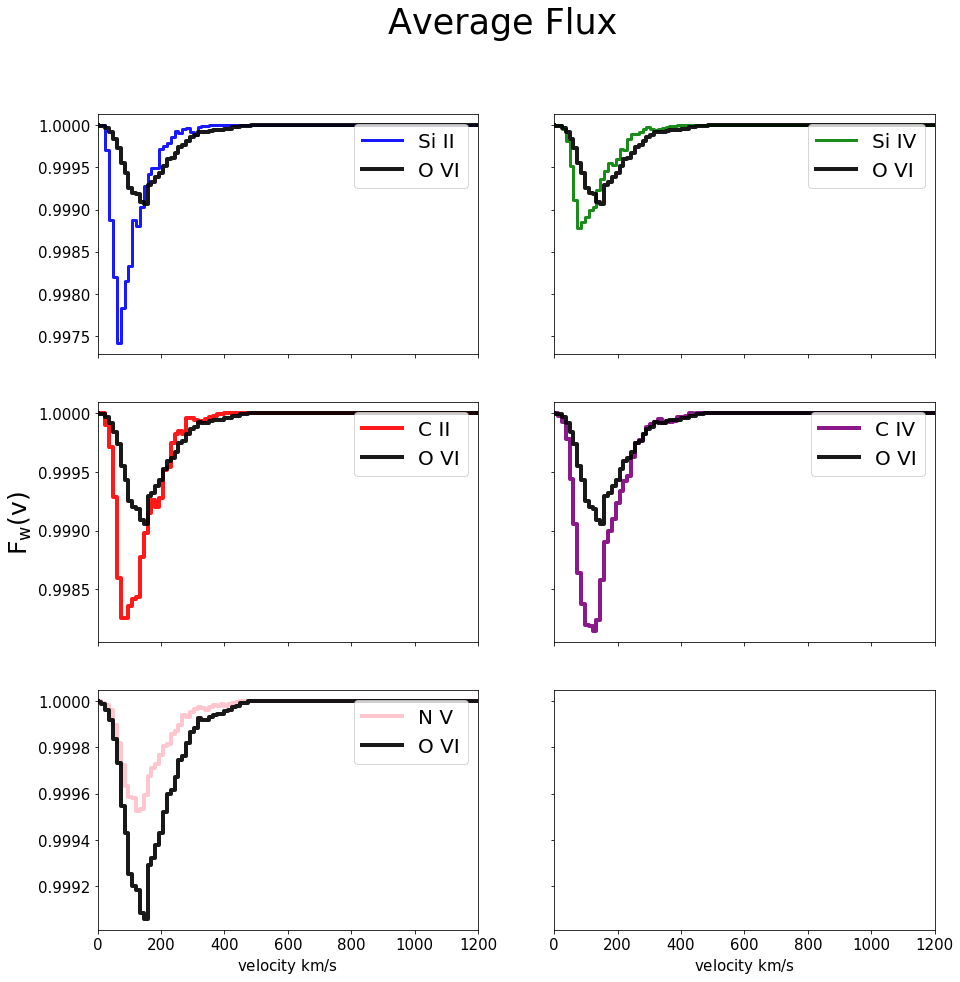

In [17]:
fig = plt.figure(figsize=(12,11))
velocity=np.linspace(0,1200,100)
f, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3, 2, sharex='col', sharey='row',figsize=(15,15))
f.suptitle('Average Flux',fontsize=35)
ax1.plot(velocity, avgf_w_absorbed_SiII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='blue',label ='Si II')
ax1.plot(velocity, avgf_w_absorbed_OVI_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='black',label ='O VI')
ax2.plot(velocity, avgf_w_absorbed_SiIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='green',label ='Si IV')
ax2.plot(velocity, avgf_w_absorbed_OVI_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='black',label ='O VI')
ax3.plot(velocity, avgf_s_absorbed_CII_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='red',label ='C II')
ax3.plot(velocity, avgf_w_absorbed_OVI_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='black',label ='O VI')
ax4.plot(velocity, avgf_w_absorbed_CIV_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='purple',label ='C IV')
ax4.plot(velocity, avgf_w_absorbed_OVI_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='black',label ='O VI')
ax5.plot(velocity, avgf_w_absorbed_NV_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='pink',label ='N V')
ax5.plot(velocity, avgf_w_absorbed_OVI_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='black',label ='O VI')
ax1.legend(loc='upper right',fontsize=20)
ax2.legend(loc='upper right',fontsize=20)
ax3.legend(loc='upper right',fontsize=20)
ax4.legend(loc='upper right',fontsize=20)
ax5.legend(loc='upper right',fontsize=20)
ax5.set_xlabel('velocity $km/s$',fontsize=15)
ax6.set_xlabel('velocity $km/s$',fontsize=15)
ax3.set_ylabel(r'$F_{w}(v)$',fontsize=25)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
ax5.set_xlim(0,1200,300)
ax6.set_xlim(0,1200,300)
#plt.savefig(dnameout+'OptDepth_SiII_OVI'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

<Figure size 864x792 with 0 Axes>

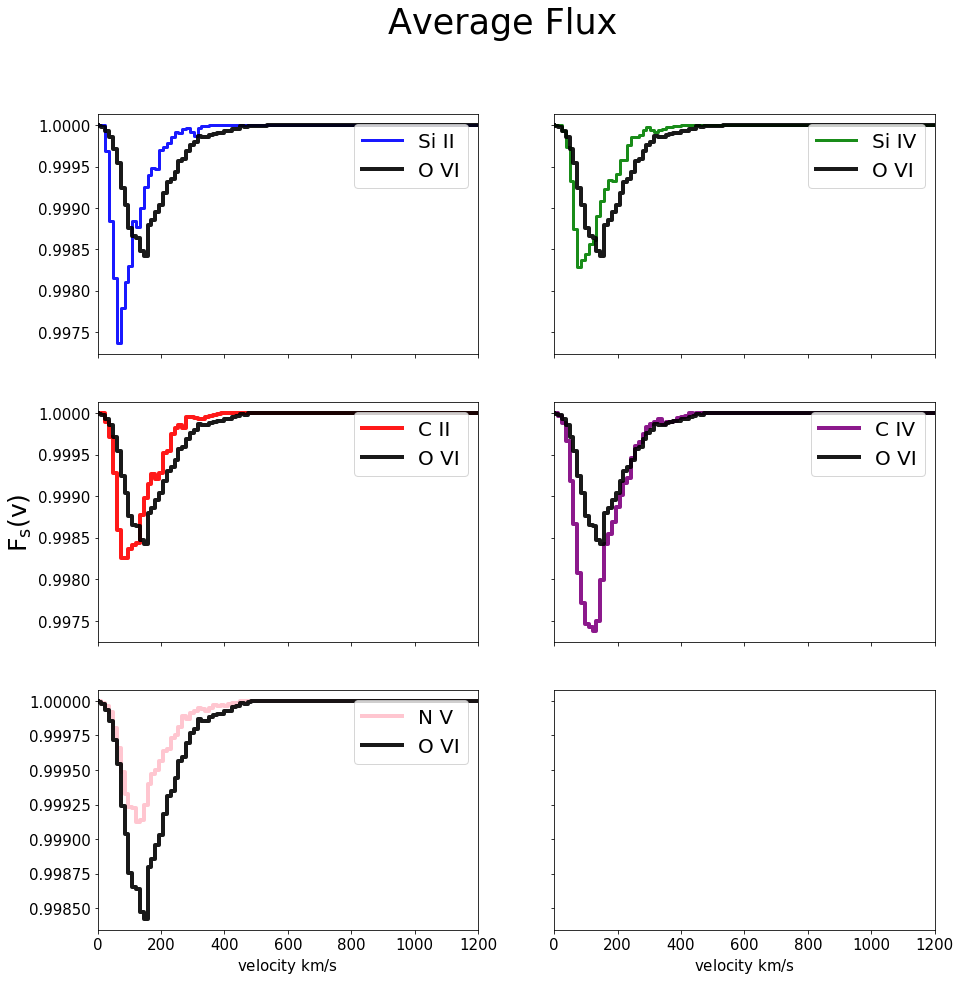

In [18]:
fig = plt.figure(figsize=(12,11))
velocity=np.linspace(0,1200,100)
f, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3, 2, sharex='col', sharey='row',figsize=(15,15))
f.suptitle('Average Flux',fontsize=35)
ax1.plot(velocity, avgf_s_absorbed_SiII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='blue',label ='Si II')
ax1.plot(velocity, avgf_s_absorbed_OVI_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='black',label ='O VI')
ax2.plot(velocity, avgf_s_absorbed_SiIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='green',label ='Si IV')
ax2.plot(velocity, avgf_s_absorbed_OVI_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='black',label ='O VI')
ax3.plot(velocity, avgf_s_absorbed_CII_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='red',label ='C II')
ax3.plot(velocity, avgf_s_absorbed_OVI_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='black',label ='O VI')
ax4.plot(velocity, avgf_s_absorbed_CIV_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='purple',label ='C IV')
ax4.plot(velocity, avgf_s_absorbed_OVI_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='black',label ='O VI')
ax5.plot(velocity, avgf_s_absorbed_NV_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='pink',label ='N V')
ax5.plot(velocity, avgf_s_absorbed_OVI_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='black',label ='O VI')
ax1.legend(loc='upper right',fontsize=20)
ax2.legend(loc='upper right',fontsize=20)
ax3.legend(loc='upper right',fontsize=20)
ax4.legend(loc='upper right',fontsize=20)
ax5.legend(loc='upper right',fontsize=20)
ax5.set_xlabel('velocity $km/s$',fontsize=15)
ax6.set_xlabel('velocity $km/s$',fontsize=15)
ax3.set_ylabel(r'$F_{s}(v)$',fontsize=25)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
ax5.set_xlim(0,1200,300)
ax6.set_xlim(0,1200,300)
#plt.savefig(dnameout+'OptDepth_SiII_OVI'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

In [19]:
c_SiII_dx=((avgf_w_absorbed_SiII_dx-1.)**2.)/(avgf_s_absorbed_SiII_dx-1.-(2.*(avgf_w_absorbed_SiII_dx-1.)))
c_SiIV_dx=((avgf_w_absorbed_SiIV_dx-1.)**2.)/(avgf_s_absorbed_SiIV_dx-1.-(2.*(avgf_w_absorbed_SiIV_dx-1.)))
c_OVI_dx=((avgf_w_absorbed_OVI_dx-1.)**2.)/(avgf_s_absorbed_OVI_dx-1.-(2.*(avgf_w_absorbed_OVI_dx-1.)))
c_CII_dx=((avgf_w_absorbed_CII_dx-1.)**2.)/(avgf_s_absorbed_CII_dx-1.-(2.*(avgf_w_absorbed_CII_dx-1.)))
c_CIV_dx=((avgf_w_absorbed_CIV_dx-1.)**2.)/(avgf_s_absorbed_CIV_dx-1.-(2.*(avgf_w_absorbed_CIV_dx-1.)))
c_NV_dx=((avgf_w_absorbed_NV_dx-1.)**2.)/(avgf_s_absorbed_NV_dx-1.-(2.*(avgf_w_absorbed_NV_dx-1.)))

/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: inva

In [20]:
where_are_NaNs1 = isnan(c_SiIV_dx)
where_are_NaNs2 = isnan(c_SiII_dx)
where_are_NaNs3 = isnan(c_OVI_dx)
where_are_NaNs4 = isnan(c_CII_dx)
where_are_NaNs5 = isnan(c_CIV_dx)
where_are_NaNs6 = isnan(c_NV_dx)
c_SiIV_dx[where_are_NaNs1] = 0
c_SiII_dx[where_are_NaNs2] = 0
c_OVI_dx[where_are_NaNs3] = 0
c_CII_dx[where_are_NaNs4] = 0
c_CIV_dx[where_are_NaNs5] = 0
c_NV_dx[where_are_NaNs6] = 0

<Figure size 864x792 with 0 Axes>

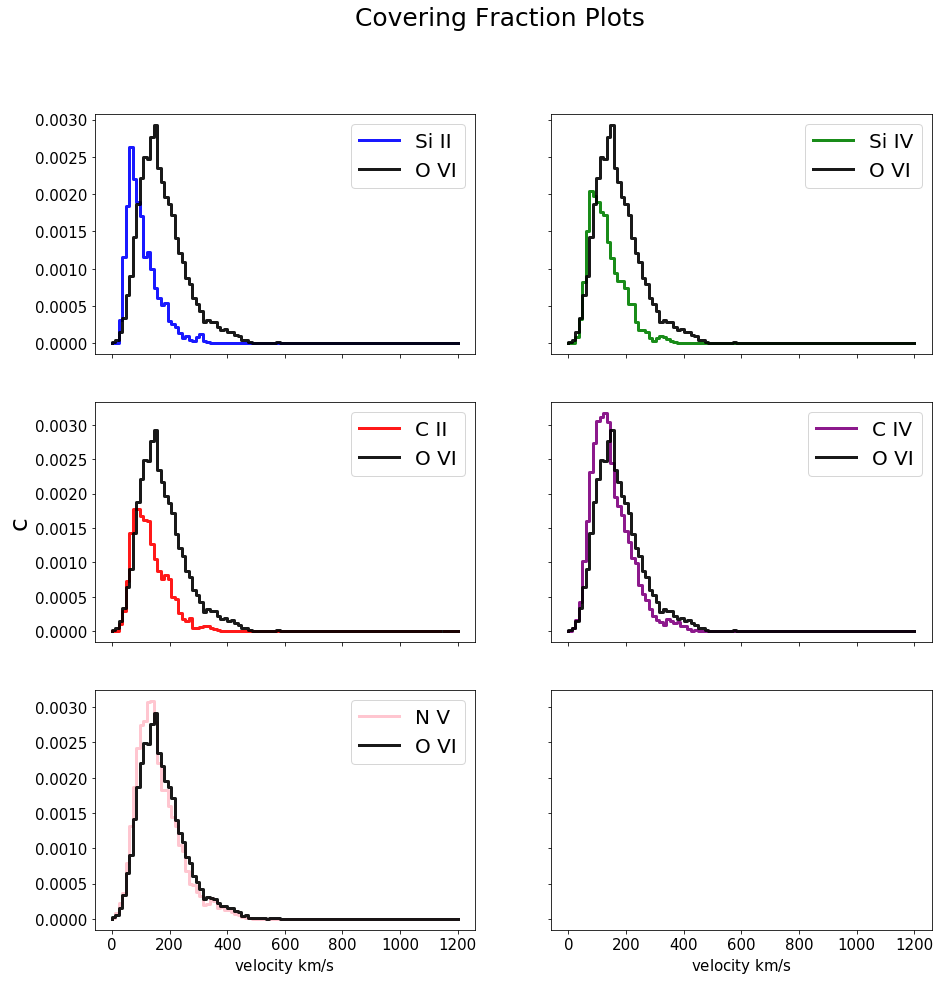

In [21]:
fig = plt.figure(figsize=(12,11))
velocity=np.linspace(0,1200,100)
f, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(3, 2, sharex='col', sharey='row',figsize=(15,15))
f.suptitle('Covering Fraction Plots',fontsize=25)
ax1.plot(velocity, c_SiII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='blue',label ='Si II')
ax1.plot(velocity, c_OVI_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='black',label ='O VI')
ax2.plot(velocity, c_SiIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='green',label ='Si IV')
ax2.plot(velocity, c_OVI_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='black',label ='O VI')
ax3.plot(velocity, c_CII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='red',label ='C II')
ax3.plot(velocity, c_OVI_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='black',label ='O VI')
ax4.plot(velocity, c_CIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='purple',label ='C IV')
ax4.plot(velocity, c_OVI_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='black',label ='O VI')
ax5.plot(velocity, c_NV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='pink',label ='N V')
ax5.plot(velocity, c_OVI_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='black',label ='O VI')
ax1.legend(loc='upper right',fontsize=20)
ax2.legend(loc='upper right',fontsize=20)
ax3.legend(loc='upper right',fontsize=20)
ax4.legend(loc='upper right',fontsize=20)
ax5.legend(loc='upper right',fontsize=20)
ax5.set_xlabel('velocity $km/s$',fontsize=15)
ax6.set_xlabel('velocity $km/s$',fontsize=15)
ax3.set_ylabel(r'c',fontsize=25)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
#plt.savefig(dnameout+'OptDepth_SiII_OVI'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

In [22]:
Tau_0_OVI_dx=np.log(1-avgf_w_absorbed_OVI_dx)-np.log(avgf_w_absorbed_OVI_dx-avgf_s_absorbed_OVI_dx)
Tau_0_SiII_dx=np.log(1-avgf_w_absorbed_SiII_dx)-np.log(avgf_w_absorbed_SiII_dx-avgf_s_absorbed_SiII_dx)
Tau_0_SiIV_dx=np.log(1-avgf_w_absorbed_SiIV_dx)-np.log(avgf_w_absorbed_SiIV_dx-avgf_s_absorbed_SiIV_dx)
Tau_0_CII_dx=np.log(1-avgf_w_absorbed_CII_dx)-np.log(avgf_w_absorbed_CII_dx-avgf_s_absorbed_CII_dx)
Tau_0_CIV_dx=np.log(1-avgf_w_absorbed_CIV_dx)-np.log(avgf_w_absorbed_CIV_dx-avgf_s_absorbed_CIV_dx)
Tau_0_NV_dx=np.log(1-avgf_w_absorbed_NV_dx)-np.log(avgf_w_absorbed_NV_dx-avgf_s_absorbed_NV_dx)

/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in subtract
  """Entry point for launching an IPython kernel.
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/litadlc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipyk

In [23]:
where_are_NaNs = isnan(Tau_0_OVI_dx)
where_are_NaNs1 = isnan(Tau_0_SiII_dx)
where_are_NaNs2 = isnan(Tau_0_SiIV_dx)
where_are_NaNs3 = isnan(Tau_0_CII_dx)
where_are_NaNs4 = isnan(Tau_0_CIV_dx)
where_are_NaNs5 = isnan(Tau_0_NV_dx)
Tau_0_OVI_dx[where_are_NaNs] = 0
Tau_0_SiII_dx[where_are_NaNs1] = 0
Tau_0_SiIV_dx[where_are_NaNs2] = 0
Tau_0_CII_dx[where_are_NaNs3] = 0
Tau_0_CIV_dx[where_are_NaNs4] = 0
Tau_0_NV_dx[where_are_NaNs5] = 0
Tau_0_OVI_dx[Tau_0_OVI_dx == inf] = 0
Tau_0_OVI_dx[Tau_0_OVI_dx < 0] = 0
Tau_0_SiIV_dx[Tau_0_SiIV_dx == inf] = 0
Tau_0_NV_dx[Tau_0_NV_dx == inf] = 0
Tau_0_SiIV_dx[Tau_0_SiIV_dx < 0] = 0
Tau_0_CII_dx[Tau_0_CII_dx < 0] = 0
Tau_0_CIV_dx[Tau_0_CIV_dx < 0] = 0
Tau_0_SiII_dx[Tau_0_SiII_dx < 0] = 0
Tau_0_NV_dx[Tau_0_NV_dx < 0] = 0

In [24]:
dnameout='/Users/litadlc/Desktop/10tcc/' # directory where the plot will be saved
istart = 398 # starting file number
iend   = 398 # ending file number
for i in range(istart,iend+1,30):
    print(i)

398


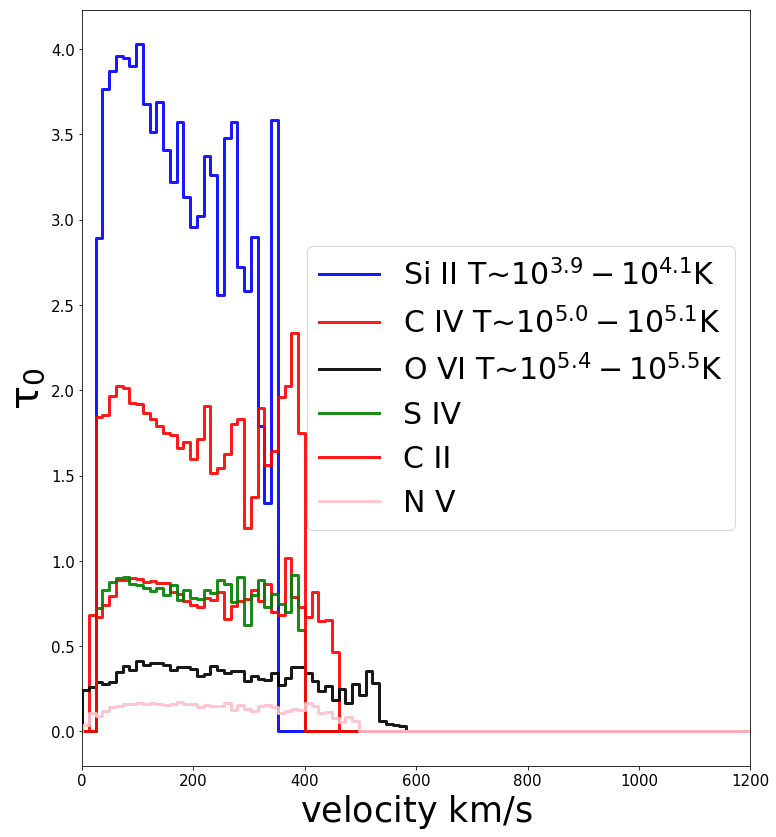

In [25]:
fig = plt.figure(figsize=(16,14))
velocity=np.linspace(0,1200,100)
ax = fig.add_axes([0.19,0.17,0.58,0.75])
plt.plot(velocity, Tau_0_SiII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='blue',label ='Si II T~$10^{3.9}-10^{4.1} K$')
plt.plot(velocity, Tau_0_CIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='red',label ='C IV T~$10^{5.0}-10^{5.1} K$' )
plt.plot(velocity, Tau_0_OVI_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='black',label ='O VI T~$10^{5.4}-10^{5.5} K$')
plt.plot(velocity, Tau_0_SiIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='green',label ='S IV')
plt.plot(velocity, Tau_0_CII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='red',label ='C II')
plt.plot(velocity, Tau_0_NV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='pink',label ='N V')
plt.legend(loc='center right',fontsize=30)
ax.set_xlabel('velocity $km/s$',fontsize=35)
ax.set_ylabel(r'$\tau_{0}$',fontsize=40)
matplotlib.rc('xtick', labelsize=30)
matplotlib.rc('ytick', labelsize=30) 
ax.set_xlim(0,1200,100)
#plt.savefig(dnameout+'OptDepth_SiII_OVI_CIV'+str(i)+'.png', dpi=300)
#plt.close(fig)
plt.show()

In [26]:
#x=-np.log(.10)
#Tau_0_OVI[Tau_0_OVI >= x] = x
#Tau_0_SiII[Tau_0_SiII >= x] = x

In [27]:
#Plot for weak flux lines
#fig = plt.figure(figsize=(12,11))
#velocity=np.linspace(0,1200,100)
#ax = fig.add_axes([0.19,0.17,0.58,0.75])
#plt.plot(velocity, avgf_w_absorbed_OVI_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='black',label ='O VI')
#plt.plot(velocity, avgf_w_absorbed_CIV_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='purple',label ='C IV')
#plt.plot(velocity, avgf_w_absorbed_NV_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='pink',label ='N V')
#plt.legend(loc='upper right',fontsize=30)
#ax.set_xlabel('velocity $km/s$',fontsize=35)
#ax.set_ylabel(r'$F_{w}(v)$',fontsize=35)
#matplotlib.rc('xtick', labelsize=30) 
#matplotlib.rc('ytick', labelsize=30) 
#ax.set_xlim(0,800,100)
#plt.savefig(dnameout+'OptDepth_SiII_OVI'+str(i)+'.png', dpi=300)
#plt.close(fig)
#plt.show()

In [28]:
#Plot for weak flux lines
fig = plt.figure(figsize=(16,14))
velocity=np.linspace(0,1200,100)
ax = fig.add_axes([0.19,0.17,0.58,0.75])
plt.plot(velocity, avgf_w_absorbed_SiII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='blue',label ='Si II T~$10^{3.9}-10^{4.1} K$')
plt.plot(velocity, avgf_w_absorbed_CIV_dx, drawstyle='steps', alpha=0.90,linewidth=3.0, color='red',label ='C IV T~$10^{5.0}-10^{5.1} K$')
plt.plot(velocity, avgf_w_absorbed_OVI_dx, drawstyle='steps', alpha=0.90,linewidth=3.0, color='black',label ='O VI T~$10^{5.4}-10^{5.5} K$')
#plt.plot(velocity, avgf_w_absorbed_SiIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='green',label ='Si IV')
#plt.plot(velocity, avgf_w_absorbed_CII_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='red',label ='C II')
plt.legend(loc='center right',fontsize=30)
ax.set_xlabel('velocity $km/s$',fontsize=35)
ax.set_ylabel(r'$F(v)$',fontsize=35)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 
ax.set_xlim(0,1200,100)
plt.savefig(dnameout+'Flux_SiII_OVI_CIV'+str(i)+'.png', dpi=300)
plt.close(fig)
plt.show()

In [29]:
#Flux for strong lines
#fig = plt.figure(figsize=(12,11))
#velocity=np.linspace(0,1200,100)
#ax = fig.add_axes([0.19,0.17,0.58,0.75])
#plt.plot(velocity, avgf_s_absorbed_SiII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='blue',label ='Si II')
#plt.plot(velocity, avgf_s_absorbed_SiIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='green',label ='Si IV')
#plt.plot(velocity, avgf_s_absorbed_CII_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='red',label ='C II')
#plt.plot(velocity, avgf_s_absorbed_OVI_dx, drawstyle='steps', alpha=0.90, linewidth=4.0,color='black',label ='O VI')
#plt.plot(velocity, avgf_s_absorbed_CIV_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='purple',label ='C IV')
#plt.plot(velocity, avgf_s_absorbed_NV_dx, drawstyle='steps', alpha=0.90,linewidth=4.0, color='pink',label ='N V')
#plt.legend(loc='upper right',fontsize=30)
#ax.set_xlabel('velocity $km/s$',fontsize=35)
#ax.set_ylabel(r'$F_{s}(v)$',fontsize=35)
#matplotlib.rc('xtick', labelsize=30) 
#matplotlib.rc('ytick', labelsize=30) 
#ax.set_xlim(0,800,100)
#plt.savefig(dnameout+'OptDepth_SiII_OVI'+str(i)+'.png', dpi=300)
#plt.close(fig)
#plt.show()

In [30]:
#Covering Fraction
fig = plt.figure(figsize=(16,14))
velocity=np.linspace(0,1200,100)
ax = fig.add_axes([0.19,0.17,0.58,0.75])
plt.plot(velocity, c_SiII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='blue',label ='Si II T~$10^{3.9}-10^{4.1} K$')
plt.plot(velocity, c_CIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='red',label ='C IV T~$10^{5.0}-10^{5.1} K$')
plt.plot(velocity, c_OVI_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='black',label ='O VI T~$10^{5.4}-10^{5.5} K$')
#plt.plot(velocity, c_SiIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='green',label ='Si IV')
#plt.plot(velocity, c_CII_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='blue',label ='C II')
plt.legend(loc='center right',fontsize=30)
ax.set_xlabel('velocity $km/s$',fontsize=35)
ax.set_ylabel(r'$C_{f}$',fontsize=35)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 
ax.set_xlim(0,1200,100)
plt.savefig(dnameout+'CoveringFraction_SiII_OVI_CIV'+str(i)+'.png', dpi=300)
plt.close(fig)
plt.show()

In [31]:
#Covering Fraction
#fig = plt.figure(figsize=(12,11))
#velocity=np.linspace(0,1200,100)
#ax = fig.add_axes([0.19,0.17,0.58,0.75])
#plt.plot(velocity, c_OVI_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='black',label ='O VI')
#plt.plot(velocity, c_CIV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='purple',label ='C IV')
#plt.plot(velocity, c_NV_dx,drawstyle='steps', alpha=0.90,linewidth=3.0, color='pink',label ='N V')
#plt.legend(loc='upper right',fontsize=30)
#ax.set_xlabel('velocity $km/s$',fontsize=35)
#ax.set_ylabel(r'c',fontsize=35)
#matplotlib.rc('xtick', labelsize=30) 
#matplotlib.rc('ytick', labelsize=30) 
#ax.set_xlim(0,800,100)
#plt.savefig(dnameout+'OptDepth_SiII_OVI'+str(i)+'.png', dpi=300)
#plt.close(fig)
#plt.show()